<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0316_Wed_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,439 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/딥러닝 NLP/챗봇/ChatBotData.csv')
df

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [3]:
!pip install konlpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

In [5]:
DATA_PATH = '/content/drive/MyDrive/딥러닝 NLP/챗봇/'
data = pd.read_csv(DATA_PATH + 'ChatBotData.csv', encoding='utf-8')
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [6]:
sentences = list(data["Q"]) + list(data["A"])

In [7]:
tokened_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokened_sentences]
sent_len_by_eumjeol = [len(s.replace(" ", "")) for s in sentences]

In [8]:
tokened_sentences[:10]

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨']]

In [9]:
sentences[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

In [10]:
sent_len_by_token[:10]

[2, 3, 3, 4, 2, 2, 2, 4, 7, 4]

In [11]:
sent_len_by_eumjeol[:10]

[5, 9, 10, 12, 6, 8, 6, 11, 17, 14]

In [12]:
okt = Okt()
morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [13]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러', '가고', '싶다'],
 ['3', '박', '4일', '정도', '놀러', '가고', '싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

Text(0, 0.5, 'Number of sentence')

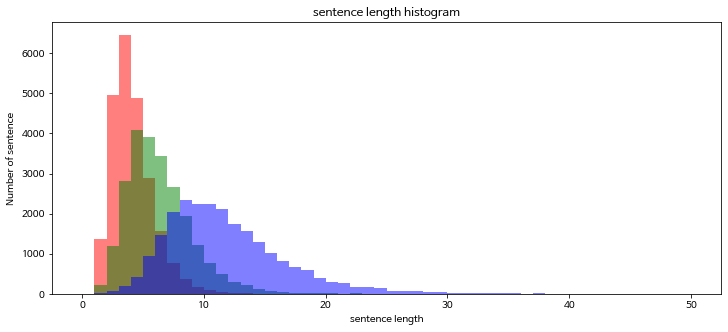

In [14]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title("sentence length histogram")
plt.xlabel("sentence length")
plt.ylabel("Number of sentence")

Text(0, 0.5, 'Number of sentence')

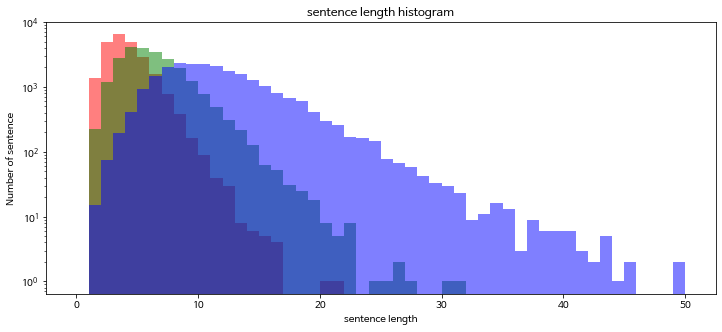

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title("sentence length histogram")
plt.xlabel("sentence length")
plt.ylabel("Number of sentence")

In [16]:
print('어절 최대 길이 : {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이 : {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 평균 길이 : {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이 : {}'.format(np.median(sent_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 75)))
print('95% 길이 : {}'.format(np.percentile(sent_len_by_token, 95)))

어절 최대 길이 : 21
어절 최소 길이 : 1
어절 평균 길이 : 3.64
어절 평균 길이 : 1.74
어절 중간 길이 : 3.0
제 1사분위 길이 : 2.0
제 3사분위 길이 : 5.0
95% 길이 : 7.0


In [17]:
print('형태소 최대 길이 : {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소 길이 : {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 평균 길이 : {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이 : {}'.format(np.median(sent_len_by_morph)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 75)))
print('95% 길이 : {}'.format(np.percentile(sent_len_by_morph, 95)))

형태소 최대 길이 : 31
형태소 최소 길이 : 1
형태소 평균 길이 : 5.83
형태소 평균 길이 : 2.71
형태소 중간 길이 : 5.0
제 1사분위 길이 : 4.0
제 3사분위 길이 : 7.0
95% 길이 : 11.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa23a542bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa23a5728d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa23a48ad90>,
 'means': [<matplotlib.lines.Line2D at 0x7fa23a668950>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa23a4f1f50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa23a54fe10>,
  <matplotlib.lines.Line2D at 0x7fa239f62990>]}

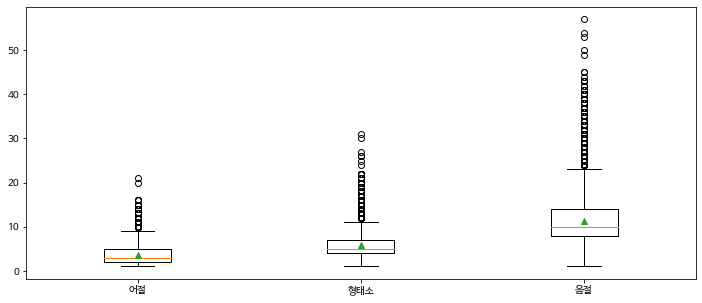

In [19]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], labels=['어절', '형태소', '음절'], showmeans=True)

In [20]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

In [21]:
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

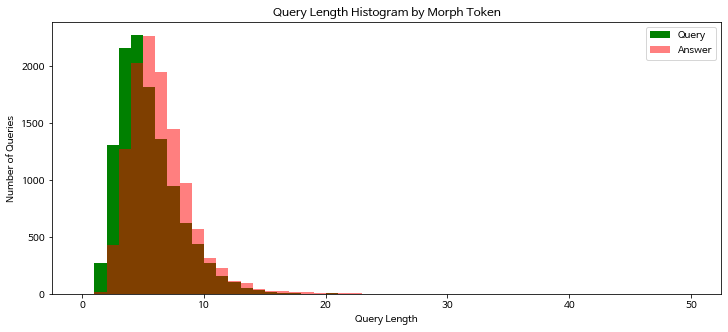

In [22]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [23]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

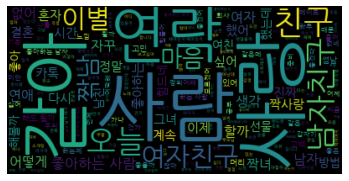

In [24]:
query_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

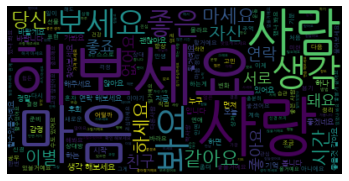

In [25]:
query_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()